# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

### Question 1: Is the distribution of body temperatures normal?
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

To answer this question, we will employ the popular $\chi^2$ goodness of fit test introduced by Karl Pearson. For $k$ nonoverlapping intervals that partion the range of the random variable, the null and alternative hypotheses are

\begin{align}
H_0: p_1 &= \pi_1, p_2 = \pi_2, \dots, p_k = \pi_k \\
H_1: p_i &\ne \pi_i \mbox{ for at least one } i
\end{align}

In [31]:
#explore first few rows of the data
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [32]:
#summary statistics
df.loc[:,"temperature"].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

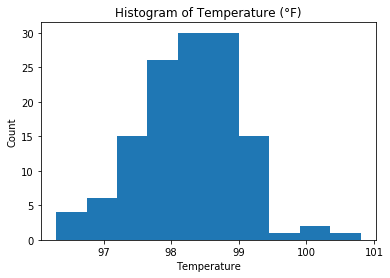

In [33]:
#histogram of data
ob_cnts, bins, patches = plt.hist(df.loc[:,"temperature"],10)
plt.title("Histogram of Temperature (\u00b0F)")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

In [34]:
#mle estimators for a normal distribution
mu_hat = df.loc[:,"temperature"].mean()
std_hat = df.loc[:,"temperature"].values.std() #numpy std dev function

#expected counts for bins
rv_norm = stats.norm(mu_hat, std_hat)
probs = np.zeros(ob_cnts.shape[0])
t = rv_norm.cdf(bins[1:-1])
probs[0] = t[0]
probs[1:-1] = t[1:] - t[:-1]
probs[-1:] = 1 - t[-1:]
exp_cnts = sum(ob_cnts) * probs
exp_cnts

array([  2.60639034,   7.19769986,  16.97284249,  27.69950814,
        31.29248298,  24.47272282,  13.2480223 ,   4.9628369 ,
         1.28600224,   0.26149192])

In [35]:
#define bins so that estimated expected counts are greater than or equal to 5
#combine first two bins and last three bins
exp_cnts_adj = np.zeros(7)
exp_cnts_adj[0] = exp_cnts[0] + exp_cnts[1]
exp_cnts_adj[1:6] = exp_cnts[2:7]
exp_cnts_adj[6] = exp_cnts[7] + exp_cnts[8] + exp_cnts[9]
ob_cnts_adj = np.zeros(7)
ob_cnts_adj[0] = ob_cnts[0] + ob_cnts[1]
ob_cnts_adj[1:6] = ob_cnts[2:7]
ob_cnts_adj[6] = ob_cnts[7] + ob_cnts[8] + ob_cnts[9]

In [36]:
#calculate chi-sq test stat
c = sum((ob_cnts_adj - exp_cnts_adj)**2 / exp_cnts_adj)
crit_val = stats.chi2.ppf(0.95,4)
print("c = " + str(c) + "; critical value = " + str(crit_val))

c = 2.8388997794; critical value = 9.48772903678


In [37]:
#KS-statistic
stats.kstest(df.loc[:,"temperature"].values, 'norm', alternative='two-sided', args=(mu_hat,std_hat), mode = 'asymp')

KstestResult(statistic=0.063853484278839079, pvalue=0.66418834787931214)

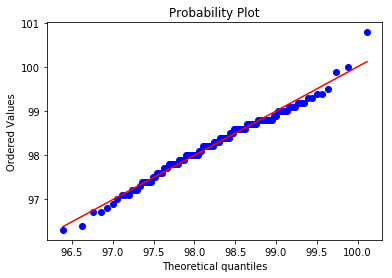

In [38]:
#Probability Plot
osm, osr = stats.probplot(df.loc[:,"temperature"], sparams = (mu_hat, std_hat), plot=plt)
plt.show()

### Answer 1: Is the distribution of body temperatures normal?
Since the test statistic c = 2.84 is less than the critical value crit_val = 9.49, we fail to reject to the null hypothesis that temperature is normally distributed. The Kolmogorov-Smirnov test produces a p-value of 0.6642 > 0.05, which fails to reject the null hypothesis as well. In addition, the probability plot gives visual evidence that temperature can be assumed to be normally distributed.

### Question 2: Is the sample size large? Are the observations independent?

Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

### Answer 2:
Since we can safely assume that the each observation $X_i$ is normally distributed, the question of sample size is most likely irrelavent. A large sample size of i.i.d random variables is so that the normal (or t) distribution provides a good approximation of the distribution of the sum of the random variables. In the case of normal variables, the sum of two normal variables is once again normal. More than likely the observations $X_i, i=1,\dots,130$ are independent and identically distributed since they are from a medical study to critically evaluate the mean body temperature.

### Question 3:
Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the $t$ or $z$ statistic?
Now try using the other test. How is the result be different? Why?

In [39]:
#use a one-sample t-test since the std dev is unknown
test_stat = (mu_hat - 98.6) / (std_hat / np.sqrt(df.shape[0]))
crit_val = stats.t.ppf(0.025,df.shape[0] - 1)

In [40]:
print(test_stat)
print(crit_val)

-5.47592520208
-1.97852449146


In [41]:
#z-test is appropriate when we can assume that std dev of the population is known
crit_val_z = stats.norm.ppf(0.025)
print(crit_val_z)

-1.95996398454


### Answer 3:
We can conclude that the true population mean is not $98.6$ since the t-test statistic equals $-5.48$ which is less than or equal to the critical value of $-1.98$. The conclusion does not change if we use a z-test instead of t-test  

### Question 4:
Draw a small sample of size 10 from the data and repeat both tests. Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

In [59]:
indices = np.random.randint(1,df.shape[0],10)
sample = df.loc[:,"temperature"].iloc[indices]

mu_star_hat = sample.mean()
std_star_hat = sample.std()
test_stat = (mu_star_hat - 98.6) / (std_star_hat / 3)
t_val = stats.t.ppf(0.025,9)
z_val = stats.norm.ppf(0.025)
print(test_stat, t_val, z_val)

-0.7916727801189136 -2.26215716274 -1.95996398454


### Answer 4:
The correct test to use is the t-test since the standard deviation is estimated and 10 is a small sample size

### Question 5:
At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [89]:
mu_hat = df.loc[:,"temperature"].mean()
std_hat = df.loc[:,"temperature"].std()
#2-sided 95% confidence
t_low = stats.t.ppf(0.025,df.shape[0]-1)
t_high = stats.t.ppf(0.975,df.shape[0]-1)
mu_low = mu_hat + t_low * std_hat / np.sqrt(df.shape[0]-1)
mu_high = mu_hat + t_high * std_hat / np.sqrt(df.shape[0]-1)
print("95% confidence interval for the mean ["+str(mu_low)+","+str(mu_high)+"]")
low = stats.t.ppf(0.025,df.shape[0]-1,loc=mu_hat, scale = std_hat)
high = stats.t.ppf(0.975,df.shape[0]-1,loc=mu_hat, scale = std_hat)
print("95% confidence interval for single ob based on t-distribution ["+str(low)+","+str(high)+"]")
low = np.percentile(df.loc[:,"temperature"],2.5)
high = np.percentile(df.loc[:,"temperature"],97.5)
print("95% confidence interval for single ob based on sample percentiles ["+str(low)+","+str(high)+"]")

95% confidence interval for the mean [98.1215107263,98.3769508121]
95% confidence interval for single ob based on t-distribution [96.7986099343,99.6998516041]
95% confidence interval for single ob based on sample percentiles [96.7225,99.4775]


### Answer 5
Assuming the data is representative of the population, if someone's temperature is outside the range [96.80,99.70], then that person's temperature should be considered abnormal

### Question 6:
Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem

In [110]:
#Use 2-sided 2-sample t-test
male_sample = df.loc[df.loc[:,"gender"] == "M","temperature"]
female_sample = df.loc[df.loc[:,"gender"] == "F","temperature"]
stats.ttest_ind(male_sample,female_sample)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

In [138]:
#Bootstrap test
data = (male_sample.values, female_sample.values)
ht = DiffMeansPermute(data)
p_value = ht.PValue(iters=1000000)
print('Means permute temperature')
print('p-value =', p_value)
print('actual =', ht.actual)

Means permute temperature
p-value = 0.023975
actual = 0.289230769231


### Answer 6:
A 2-sided, 2-sample t-test is appropriate since we have 2 indepedent samples from two normal distributions with potentially different means. It is assumed that the standard deviations of the two normal distributions are the same, although it would be a good idea to test if $\sigma^2_{male} = . \sigma^2_{female}$ using an F-test or bootstrap test. The absolute difference between the sample means is $0.29$. The p-value is $0.024$. At $95\%$ confidence level, we conclude that there is a significant difference between the average male temperature and the average female temperature. However, at the $99\%$ confidence level, we would not reject the null hypothesis

In [124]:
class HypothesisTest(object):
    """Represents a hypothesis test."""

    def __init__(self, data):
        """Initializes.

        data: data in whatever form is relevant
        """
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)
        self.test_stats = None

    def PValue(self, iters=1000):
        """Computes the distribution of the test statistic and p-value.

        iters: number of iterations

        returns: float p-value
        """
        self.test_stats = np.array([self.TestStatistic(self.RunModel()) 
                                       for _ in range(iters)])

        count = sum(self.test_stats >= self.actual)
        return count / iters

    def MaxTestStat(self):
        """Returns the largest test statistic seen during simulations.
        """
        return max(self.test_stats)

    def PlotHist(self, label=None):
        """Draws a Cdf with vertical lines at the observed test stat.
        """
        ys, xs, patches = pyplot.hist(ht.test_stats, color=COLOR4)
        pyplot.vlines(self.actual, 0, max(ys), linewidth=3, color='0.8')
        pyplot.xlabel('test statistic')
        pyplot.ylabel('count')

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        raise UnimplementedMethodException()

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        pass

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        raise UnimplementedMethodException()

class DiffMeansPermute(HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data        